In [41]:
import pandas
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import stats  # for KDE

from manim import *

In [42]:
histogram_direct = pandas.read_csv('histogram_direct.csv')
print(histogram_direct)



      x         y     cols  labs
0  -3.5  0.000873  #FF0000  -3.5
1  -3.0  0.004432  #FF6600  -3.0
2  -2.5  0.017528  #FFCC00  -2.5
3  -2.0  0.053991  #CCFF00  -2.0
4  -1.5  0.129518  #66FF00  -1.5
5  -1.0  0.241971  #00FF00  -1.0
6  -0.5  0.352065  #00FF66  -0.5
7   0.0  0.398942  #00FFCC   0.0
8   0.5  0.352065  #00CCFF   0.5
9   1.0  0.241971  #0066FF   1.0
10  1.5  0.129518  #0000FF   1.5
11  2.0  0.053991  #6600FF   2.0
12  2.5  0.017528  #CC00FF   2.5
13  3.0  0.004432  #FF00CC   3.0
14  3.5  0.000873  #FF0066   3.5


In [43]:
hist_xy = histogram_direct.loc[:, ['x','y']]
print(hist_xy)

      x         y
0  -3.5  0.000873
1  -3.0  0.004432
2  -2.5  0.017528
3  -2.0  0.053991
4  -1.5  0.129518
5  -1.0  0.241971
6  -0.5  0.352065
7   0.0  0.398942
8   0.5  0.352065
9   1.0  0.241971
10  1.5  0.129518
11  2.0  0.053991
12  2.5  0.017528
13  3.0  0.004432
14  3.5  0.000873


In [44]:
x_start = hist_xy.x.values[:(len(hist_xy.x)-1)]
x_end = hist_xy.x.values[1:]
y_start = hist_xy.y.values[:(len(hist_xy.y)-1)]
y_end = hist_xy.y.values[1:]

dict = {'x_start': x_start, 'x_end': x_end, 
        'y_start': y_start, 'y_end': y_end}

df_lines = pandas.DataFrame(dict)   
print(df_lines) 




    x_start  x_end   y_start     y_end
0      -3.5   -3.0  0.000873  0.004432
1      -3.0   -2.5  0.004432  0.017528
2      -2.5   -2.0  0.017528  0.053991
3      -2.0   -1.5  0.053991  0.129518
4      -1.5   -1.0  0.129518  0.241971
5      -1.0   -0.5  0.241971  0.352065
6      -0.5    0.0  0.352065  0.398942
7       0.0    0.5  0.398942  0.352065
8       0.5    1.0  0.352065  0.241971
9       1.0    1.5  0.241971  0.129518
10      1.5    2.0  0.129518  0.053991
11      2.0    2.5  0.053991  0.017528
12      2.5    3.0  0.017528  0.004432
13      3.0    3.5  0.004432  0.000873


In [45]:
class PointsAndLine(Scene):
    def construct(self):
        
        
        # Add the Axes
        ax = Axes(x_range=[np.min(hist_xy.x), np.max(hist_xy.x), 1], 
                  y_range=[np.min(hist_xy.y), np.max(hist_xy.y), 1])
        self.add(ax)

        # Create the dots
        # Each dot is positioned related to the Axes ax, 
        #      and not in the default manim spacing.
        dots = [Dot(ax.c2p(x, y), color=BLUE) for x, y in hist_xy.values]
        
        # Animate the creation of dots
        self.play(LaggedStart(*[Write(dot) for dot in dots], lag_ratio=.05))
        self.wait()  # wait for 1 second
        
        # Create the lines
        lines = [Line(ax.c2p(x_start,y_start), 
                      ax.c2p(x_end, y_end), 
                      color=RED) 
                 for x_start, x_end, y_start, y_end in df_lines.values]

        # Animate the creation of lines
        self.play(LaggedStart(*[Write(line) for line in lines], lag_ratio=.15))
        self.wait()  # wait for 1 second
        


# don't remove below command for run button to work
%manim -qm -v WARNING PointsAndLine

      x         y
0  -3.5  0.000873
1  -3.0  0.004432
2  -2.5  0.017528
3  -2.0  0.053991
4  -1.5  0.129518
5  -1.0  0.241971
6  -0.5  0.352065
7   0.0  0.398942
8   0.5  0.352065
9   1.0  0.241971
10  1.5  0.129518
11  2.0  0.053991
12  2.5  0.017528
13  3.0  0.004432
14  3.5  0.000873


In [ ]:
kde_example = pandas.read_csv('KDE_example.csv')
print(kde_example.head(10))

    x_start     x_end       y_start         y_end
0 -4.959204 -4.814408  5.657435e-07  7.543491e-07
1 -4.814408 -4.669612  7.543491e-07  9.998896e-07
2 -4.669612 -4.524816  9.998896e-07  1.317524e-06
3 -4.524816 -4.380020  1.317524e-06  1.725806e-06
4 -4.380020 -4.235224  1.725806e-06  2.247254e-06
5 -4.235224 -4.090428  2.247254e-06  2.908970e-06
6 -4.090428 -3.945632  2.908970e-06  3.743288e-06
7 -3.945632 -3.800836  3.743288e-06  4.788441e-06
8 -3.800836 -3.656040  4.788441e-06  6.089222e-06
9 -3.656040 -3.511244  6.089222e-06  7.697619e-06


In [46]:
class KDELine(Scene):
    def construct(self):
        
        
        # Add the Axes
        ax = Axes(x_range=[np.min(kde_example.x_start), np.max(kde_example.x_end), 1], 
                  y_range=[np.min(kde_example.y_start), np.max(kde_example.y_end), 1])
        self.add(ax)

        # Create the lines
        lines = [Line(ax.c2p(x_start,y_start), 
                      ax.c2p(x_end, y_end), 
                      color=RED) 
                 for x_start, x_end, y_start, y_end in kde_example.values]

        # Animate the creation of lines
        self.play(LaggedStart(*[Write(line) for line in lines], lag_ratio=.05))
        self.wait()  # wait for 1 second
        


# don't remove below command for run button to work
%manim -qm -v WARNING KDELine

In [63]:
kde_table = pandas.read_csv('KDE_table.csv')
#print(kde_table)


In [64]:

start_counts = kde_table.y * 0
final_counts = kde_table.y * 0.05

#print(final_counts)

In [65]:



class KDELineHisto(Scene):
    def construct(self):
        
        
        # Add the Axes
        ax = Axes(x_range=[np.min(kde_example.x_start), np.max(kde_example.x_end), 1], 
                  y_range=[np.min(kde_example.y_start), np.max(kde_example.y_end), 1])
        self.add(ax)

        # Create the lines
        lines = [Line(ax.c2p(x_start,y_start), 
                      ax.c2p(x_end, y_end), 
                      color=RED) 
                 for x_start, x_end, y_start, y_end in kde_example.values]

        # Animate the creation of lines
        self.play(LaggedStart(*[Write(line) for line in lines], lag_ratio=.05))
        self.wait()  # wait for 1 second
        
        
        chart = BarChart(
            bar_width=1.0,
            #bar_colors=DEFAULT,
            values=start_counts,
            #bar_names=midpoints,
            y_range=[0, 1, 1],
            y_length=6,
            x_length=10,
            x_axis_config={"font_size": 36},
        )

        c_bar_lbls = chart.get_bar_labels(font_size=28)

        #self.add(chart, c_bar_lbls)

        self.play(Create(chart))
        self.wait(2)
 
        self.play(chart.animate.change_bar_values(final_counts), run_time=3)
        
        self.wait(3)

        

# don't remove below command for run button to work
%manim -qm -v WARNING KDELineHisto

/srv/jupyter_python3-extra/lib/python3.10/site-packages/manim/mobject/graphing/probability.py:524: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.05 0.2  0.15 0.2  0.45 0.5  0.55 0.75 0.7  0.6  0.25 0.15 0.25 0.2
 0.05 0.2  0.05 0.05 0.25 0.05 0.45 0.35 0.3  0.75 0.8  0.75 0.4  0.55
 0.55 1.15 0.65 0.9  0.4  0.25 0.25 0.2  0.25 0.1  0.1  0.1  0.1 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.values[: len(values)] = values
/srv/jupyter_python3-extra/lib/python3.10/site-packages/manim/mobject/graphing/probability.py:524: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.05 0.2  0.15 0.2  0.45 0.5  0.55 0.75 0.7  0.6  0.25 0.15 0.25 0.2
 0.05 0.2  0.05 0.05 0.25 0.05 0.45 0.35 0.3  0.75 0.8  0.75 0.4  0.55
 0.55 1.15 0.65 0.9  0.4  0.25 0.25 0.2  0.25 0.1  0.1  0.1  0.1 ]' h

In [ ]:
# https://manimclass.com/plot-a-function-in-manim/

In [ ]:
# Another option is to draw it as a single line

class KDELineHisto2(Scene):
    def construct(self):
        
        
        # Add the Axes
        ax = Axes(x_range=[np.min(kde_example.x_start), np.max(kde_example.x_end), 1], 
                  y_range=[np.min(kde_example.y_start), np.max(kde_example.y_end), 1])
        self.add(ax)
        
        graph = ax.plot_line_graph(kde_example.x_start, kde_example.y_start, 
                                   add_vertex_dots=False, line_color = RED)
        
        
        self.play(Write(graph))
        
        self.wait(3)

        

# don't remove below command for run button to work
%manim -qm -v WARNING KDELineHisto2

In [ ]:
# Now let's try it more directly, by defining the KDE curve and drawing that directly
# To do that, first we need to learn how to draw function curves on an axis

In [69]:
np.cos([10,20,30,40,50])

array([-0.83907153,  0.40808206,  0.15425145, -0.66693806,  0.96496603])

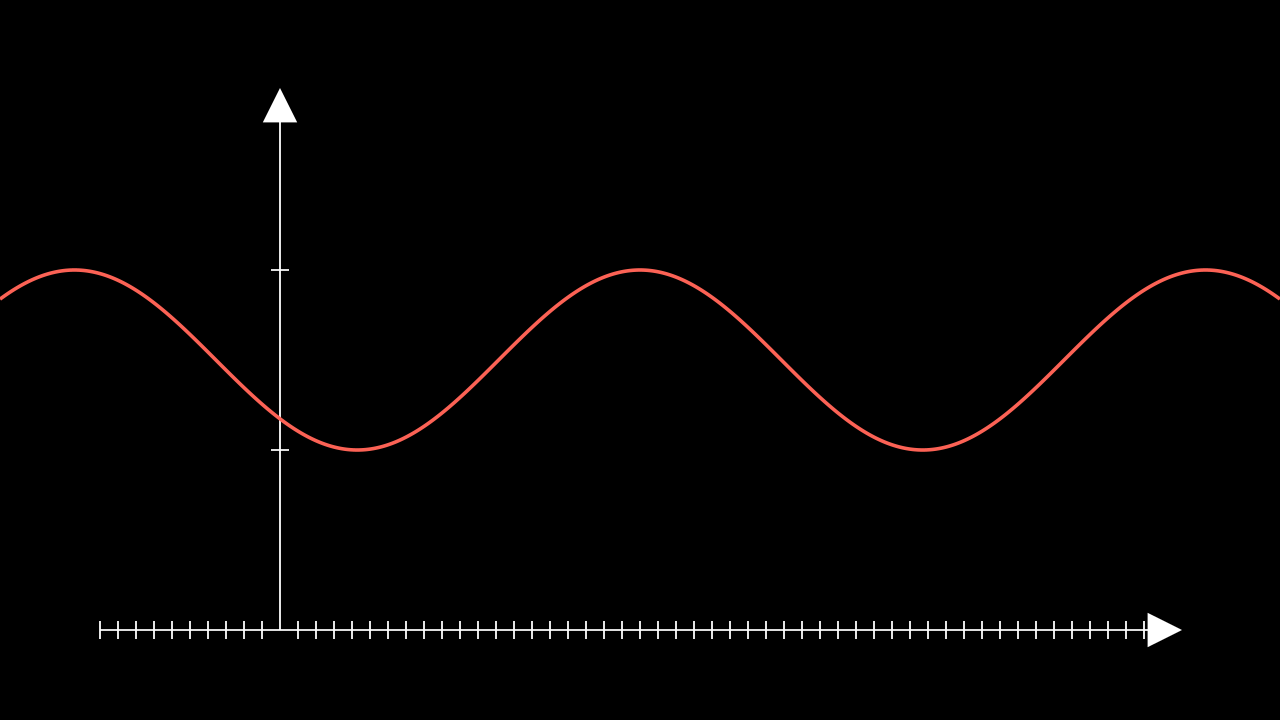

In [ ]:
class BasicCurve(Scene):
    def construct(self):
        
        
        # Add the Axes
        ax = Axes(x_range=[-10, 50, 1], 
                  y_range=[0, 3, 1])
        self.add(ax)

        cos_func = FunctionGraph(
            lambda t: np.cos(t),
            color=RED)
        
        cos_func2 = ax.plot(
            lambda t: np.cos(t), 
            color = BLUE)
        
        self.add(cos_func)

# don't remove below command for run button to work
%manim -qm -v WARNING BasicCurve

In [ ]:
# Looks like we forgot to snap the cosine curve to the axis

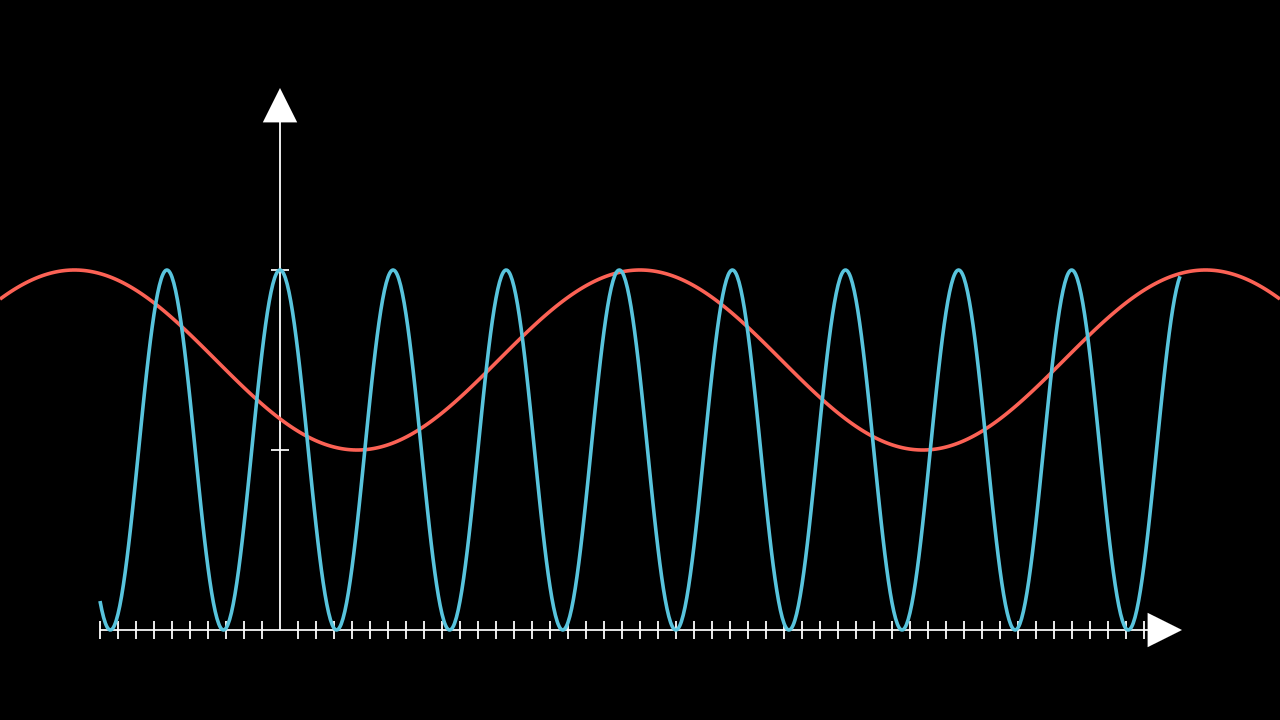

In [ ]:
class BasicCurve2(Scene):
    def construct(self):
        
        
        # Add the Axes
        ax = Axes(x_range=[-10, 50, 1], 
                  y_range=[0, 3, 1])
        self.add(ax)

        cos_func = FunctionGraph(
            lambda t: np.cos(t),
            color=RED)

        cos_func2 = ax.plot(
            lambda t: np.cos(t) + 1, 
            color = BLUE)
        
        self.add(cos_func, cos_func2)

# don't remove below command for run button to work
%manim -qm -v WARNING BasicCurve2

In [ ]:
# Okay, so ax.plot adds to the axis ax
# Does this work with FunctionGraph? 
# No, we're adding a plot to the Axis mobject, not making a new mobject

In [48]:
# Now we can try with a KDE function
# Let's get the points to be KDEd
kde_pts = pandas.read_csv('KDE_pts.csv')
print(kde_pts.head(10))

   pts
0   11
1   12
2    9
3    8
4   11
5    4
6   11
7    7
8    8
9   11


In [70]:
# Use the stats portion of the scipy package to get the KDE
# To be consistent with R, we'll use Scott's method to determine the bandwidth
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
# If you forget bw_method, the bandwidth will be too wide
kernel = stats.gaussian_kde(kde_pts.pts, bw_method="scott")
kernel

In [ ]:
# the scipi object kernel is a function that takes in a set of locations x, and 
# outputs the density at that position.


In [71]:
kernel(10)

array([0.02941004])

In [72]:
2*kernel([10,20])

array([0.05882008, 0.02838958])

In [58]:
# This doesn't work because kernel() isn't as robust to arbitrary inputs as np.sin() is.
# I really don't know why, because it seems like it should
class KDECurveBroken(Scene):
    def construct(self):
        
        
        # Add the Axes
        ax = Axes(x_range=[-10, 50, 1], 
                  y_range=[0, 3, 1])
        self.add(ax)

        kde_curve = ax.plot(
            lambda t: kernel(t), 
            color = BLUE)
        
        self.add(kde_curve)

# don't remove below command for run button to work
%manim -qm -v WARNING KDECurveBroken

ValueError: non-broadcastable output operand with shape (3,) doesn't match the broadcast shape (1,3)

In [73]:
myrange = np.arange(0,10,0.5)
myrange

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [60]:
kernel([10,20,30,40,50])

array([0.02941004, 0.01419479, 0.0417965 , 0.01154793, 0.00060924])

In [61]:
kernel(myrange)

array([0.00277644, 0.00349223, 0.00433827, 0.00532406, 0.00645627,
       0.0077378 , 0.00916685, 0.01073593, 0.01243112, 0.01423141,
       0.01610847, 0.01802669, 0.01994387, 0.02181237, 0.0235809 ,
       0.02519682, 0.02660891, 0.02777034, 0.02864173, 0.02919389])

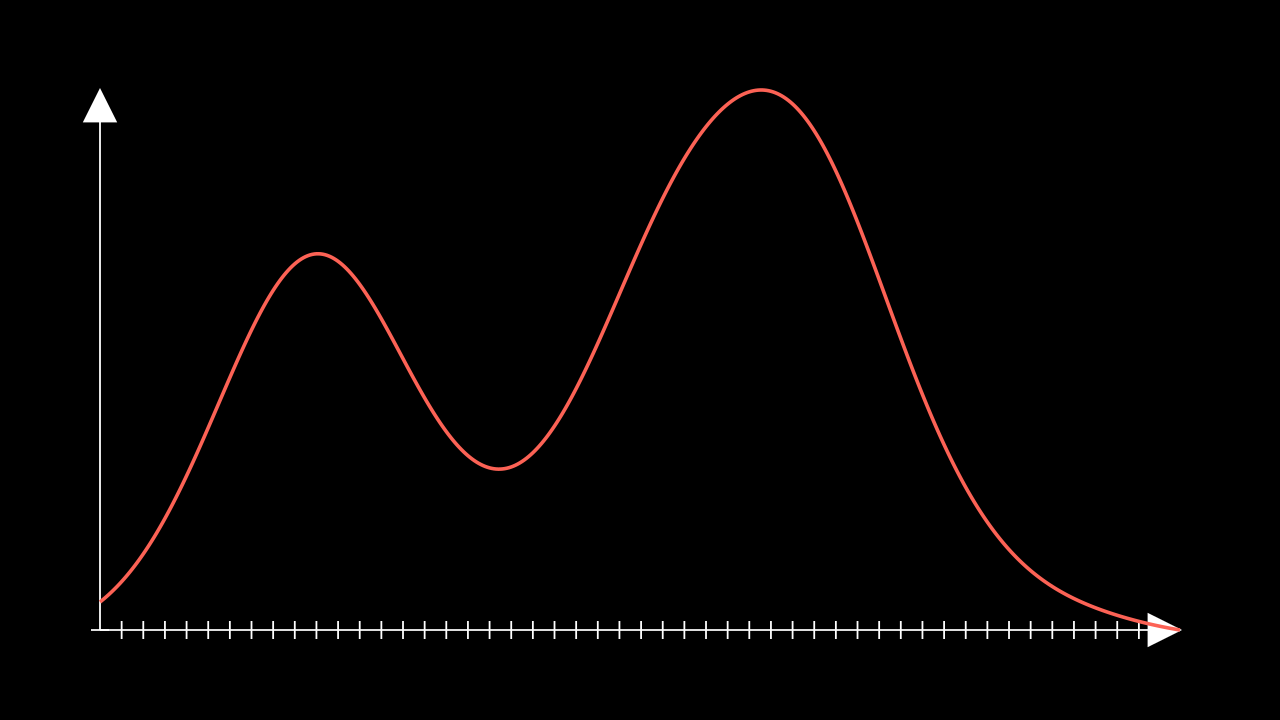

In [74]:
# We can however plot the points as a line
# https://manimclass.com/plot-a-function-in-manim/



class KDECurveFixed(Scene):
    def construct(self):
        
        
        kde_x =  np.arange(0,50,0.1)
        kde_y =  kernel(kde_x)

        # Add the Axes
        ax = Axes(x_range=[np.min(kde_x), np.max(kde_x), 1], 
                  y_range=[np.min(kde_y), np.max(kde_y), 1])
        self.add(ax)

        
        kde_curve = ax.plot_line_graph(kde_x, kde_y, 
                        add_vertex_dots=False, line_color = RED)
        
        self.add(kde_curve)

# don't remove below command for run button to work
%manim -qm -v WARNING KDECurveFixed

In [ ]:
# Next: Manim: Heatmap
# Let's start with the ImageMobject on a simple gradient

In [76]:
n = 5
imageArray = np.uint8(
    [[i * 5 / n for i in range(0, n)] for _ in range(0, n)])
    
imageArray

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]], dtype=uint8)

array([[-4.95920379e+00, -4.81440777e+00,  5.65743466e-07,
         7.54349108e-07],
       [-4.81440777e+00, -4.66961175e+00,  7.54349108e-07,
         9.99889623e-07],
       [-4.66961175e+00, -4.52481573e+00,  9.99889623e-07,
         1.31752417e-06]])

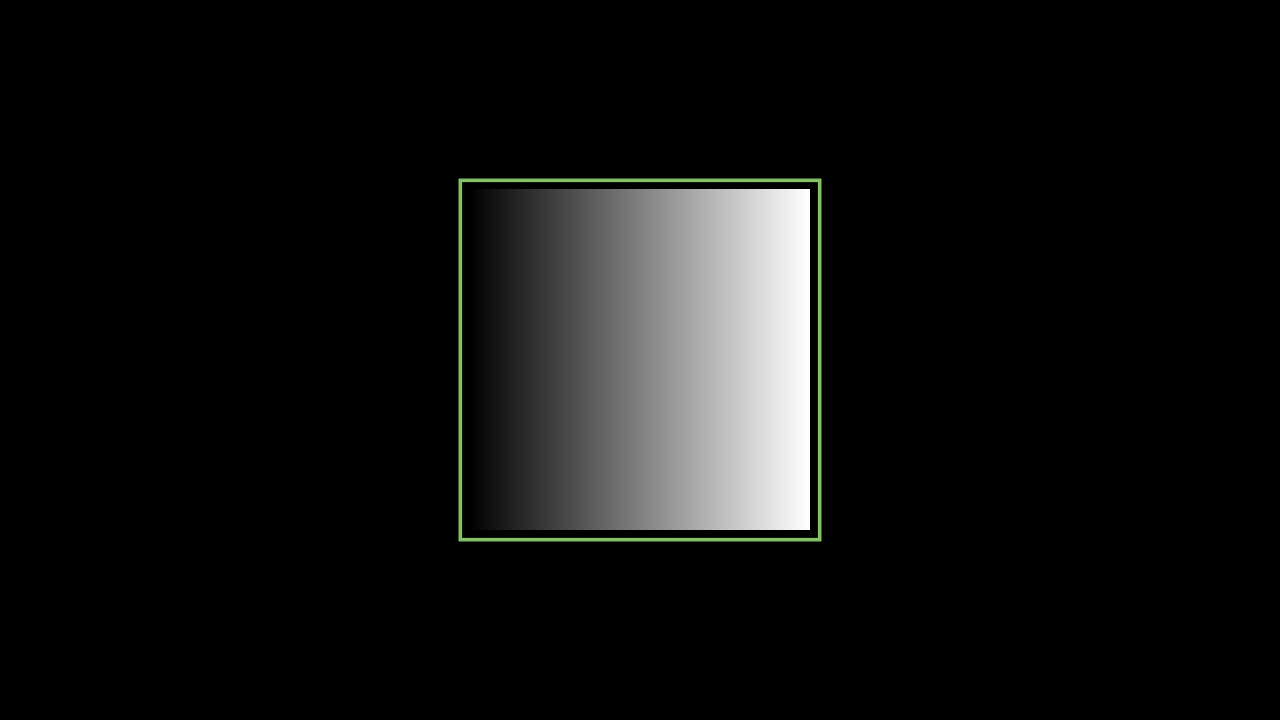

In [82]:
# https://docs.manim.community/en/stable/examples.html

class GradientImageFromArray(Scene):
    def construct(self):
        n = 256
        imageArray = np.uint8(
            [[i * 256 / n for i in range(0, n)] for _ in range(0, n)]
        )
        image = ImageMobject(imageArray).scale(2)
        image.background_rectangle = SurroundingRectangle(image, color=GREEN)
        self.add(image, image.background_rectangle)



# don't remove below command for run button to work
%manim -qm -v WARNING GradientImageFromArray

In [83]:
mini = kde_example.head(3)
mini.to_numpy()

array([[-4.95920379e+00, -4.81440777e+00,  5.65743466e-07,
         7.54349108e-07],
       [-4.81440777e+00, -4.66961175e+00,  7.54349108e-07,
         9.99889623e-07],
       [-4.66961175e+00, -4.52481573e+00,  9.99889623e-07,
         1.31752417e-06]])

In [99]:
volcano_df = pandas.read_csv('volcano.csv') # loads the data frame
volcano_array = volcano_df.to_numpy() # converts to array

# adds on the additional info that this should be interpreted
# as an 8-bit integer
volcano_array = np.uint8(volcano_array)
volcano_array

array([[100, 100, 101, ..., 104, 104, 103],
       [101, 101, 102, ..., 105, 104, 104],
       [102, 102, 103, ..., 105, 105, 104],
       ...,
       [ 98,  98,  98, ...,  94,  94,  94],
       [ 97,  98,  98, ...,  94,  94,  94],
       [ 97,  97,  97, ...,  94,  94,  94]], dtype=uint8)

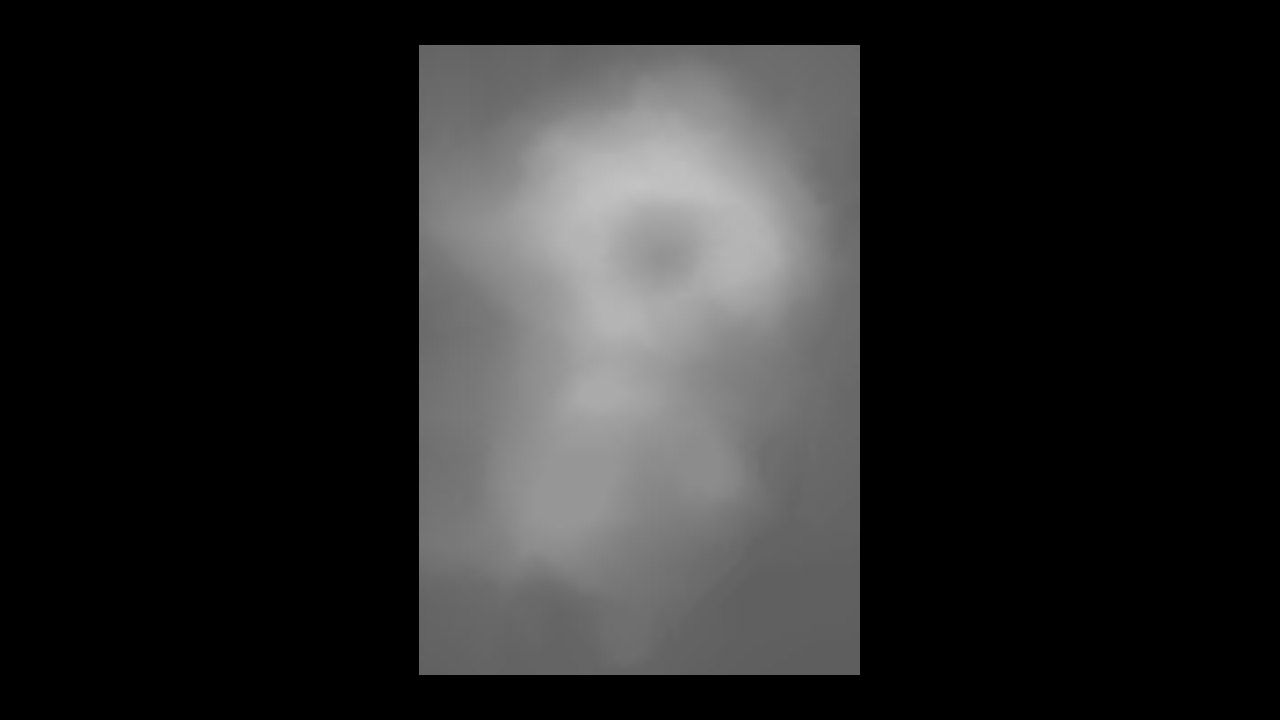

In [101]:
# https://docs.manim.community/en/stable/examples.html

class VolcanoImageFromArray(Scene):
    def construct(self):
       
        image = ImageMobject(volcano_array)
        image.height = 7 # you can also put .scale(5) on the ImageMobject()
        self.add(image)


# don't remove below command for run button to work
%manim -qm -v WARNING VolcanoImageFromArray

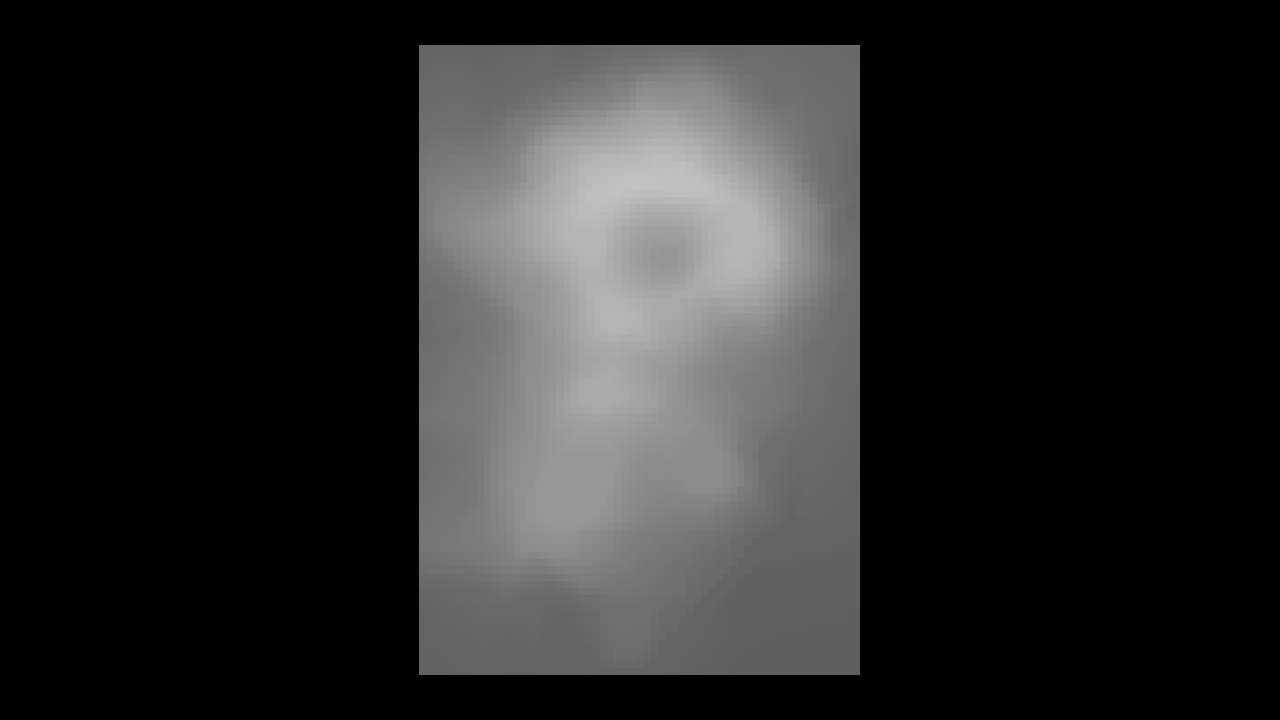

In [102]:
# Changing the smoothing algorithm to make it more tile like

class VolcanoImageFromArray2(Scene):
    def construct(self):
       
        image = ImageMobject(volcano_array)
        image.height = 7 # you can also put .scale(5) on the ImageMobject()
        image.set_resampling_algorithm(RESAMPLING_ALGORITHMS["nearest"])
        self.add(image)


# don't remove below command for run button to work
%manim -qm -v WARNING VolcanoImageFromArray2

In [115]:
volcano_array2 = volcano_df.to_numpy() # converts to array
volcano_array2 = volcano_array2 - np.min(volcano_array2)
volcano_array2 = 255.0*(volcano_array / np.max(volcano_array2))
volcano_array2 = np.round(volcano_array2, decimals=0)
volcano_array2 = np.uint8(volcano_array2)

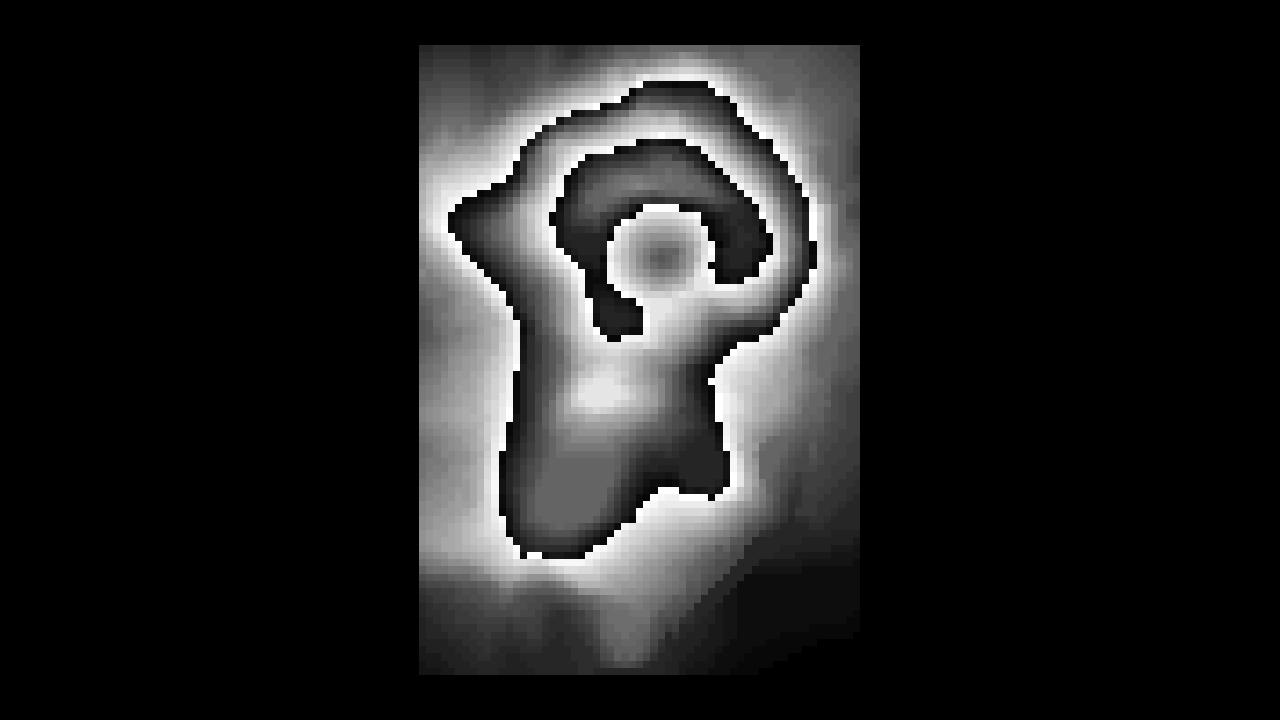

In [116]:
# expanding the range

class VolcanoImageFromArray3(Scene):
    def construct(self):
       
        image = ImageMobject(volcano_array2)
        image.height = 7 # you can also put .scale(5) on the ImageMobject()
        image.set_resampling_algorithm(RESAMPLING_ALGORITHMS["nearest"])
        self.add(image)


# don't remove below command for run button to work
%manim -qm -v WARNING VolcanoImageFromArray3

In [130]:
# Let's try with a 3D array to add colour mapping

volcano_3darray = np.zeros((len(volcano_array2), len(volcano_array2[0]), 3))
volcano_3darray[:,:,0] = volcano_array2
volcano_3darray[:,:,1] = volcano_array2 * 0.6
volcano_3darray[:,:,2] = volcano_array2 * 0.3
volcano_3darray = np.uint8(volcano_3darray)
volcano_3darray

array([[[38, 22, 11],
        [38, 22, 11],
        [45, 27, 13],
        ...,
        [63, 37, 18],
        [63, 37, 18],
        [58, 34, 17]],

       [[45, 27, 13],
        [45, 27, 13],
        [50, 30, 15],
        ...,
        [71, 42, 21],
        [63, 37, 18],
        [63, 37, 18]],

       [[50, 30, 15],
        [50, 30, 15],
        [58, 34, 17],
        ...,
        [71, 42, 21],
        [71, 42, 21],
        [63, 37, 18]],

       ...,

       [[25, 15,  7],
        [25, 15,  7],
        [25, 15,  7],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[20, 12,  6],
        [25, 15,  7],
        [25, 15,  7],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[20, 12,  6],
        [20, 12,  6],
        [20, 12,  6],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

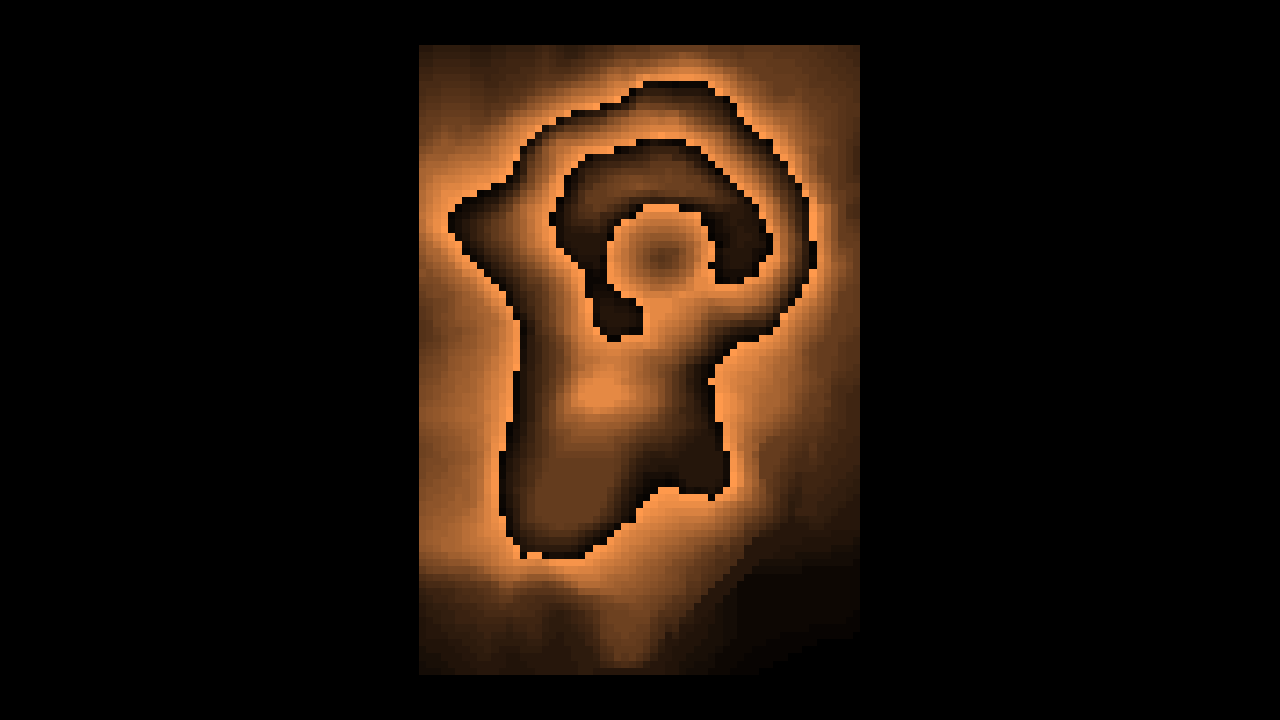

In [129]:
# expanding the range

class VolcanoImageFromArray4(Scene):
    def construct(self):
       
        image = ImageMobject(volcano_3darray)
        image.height = 7 # you can also put .scale(5) on the ImageMobject()
        image.set_resampling_algorithm(RESAMPLING_ALGORITHMS["nearest"])
        self.add(image)


# don't remove below command for run button to work
%manim -qm -v WARNING VolcanoImageFromArray4

In [ ]:
# We could also do this with hexcodes using int()
# Note that we need the '16' on the end to tell Python that we're working with base16 (hexadecimal) notation
# Also note the lack of # at the start

red = "FF00000"
green = "00FF00"
blue = "0000FF"
yellow = "DDAA00"

hexarray = 

int(


In [ ]:
np.round(histogram_direct.y, decimals=2)

0     0.00
1     0.00
2     0.02
3     0.05
4     0.13
5     0.24
6     0.35
7     0.40
8     0.35
9     0.24
10    0.13
11    0.05
12    0.02
13    0.00
14    0.00
Name: y, dtype: float64

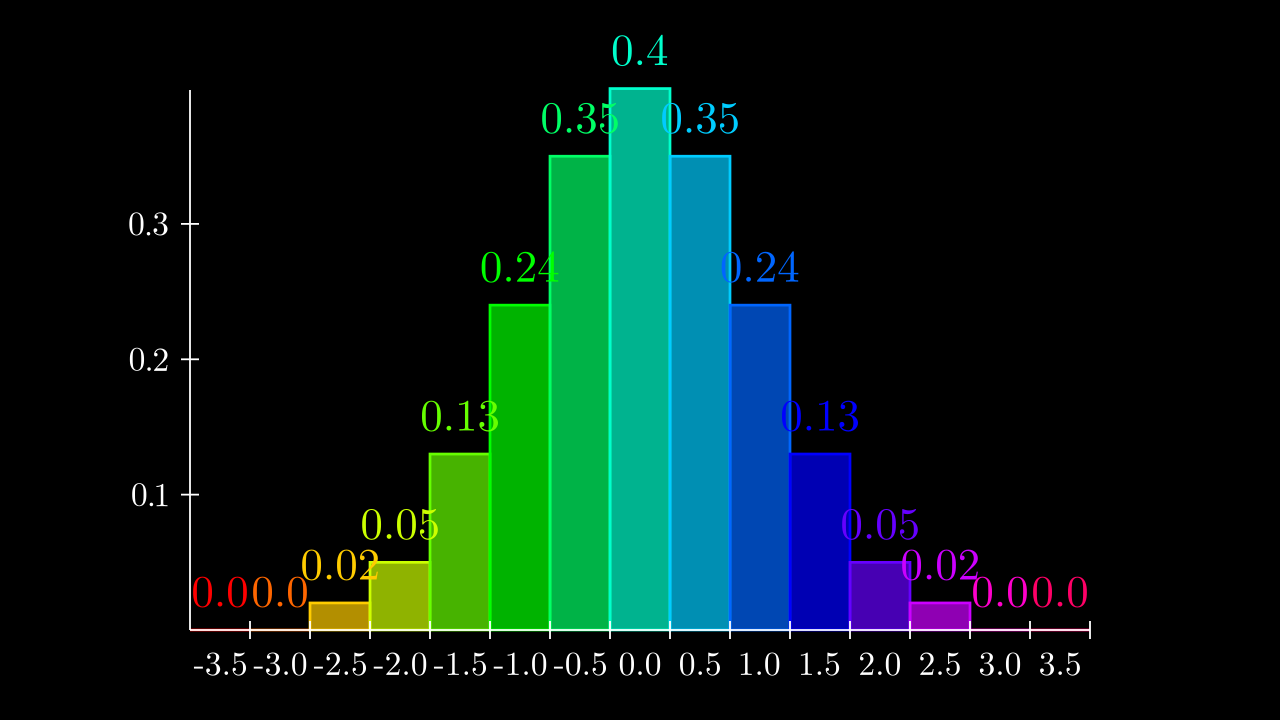

In [ ]:
class BarChartExample4(Scene):
    def construct(self):
        chart = BarChart(
            bar_width=1.0,
            bar_colors=histogram_direct.cols,
            values=np.round(histogram_direct.y, decimals = 2),
            bar_names=histogram_direct.labs,
            y_range=[0, np.max(histogram_direct.y), 0.1],
            y_length=6,
            x_length=10,
            x_axis_config={"font_size": 36},
        )

        c_bar_lbls = chart.get_bar_labels(font_size=48)

        self.add(chart, c_bar_lbls)



# don't remove below command for run button to work
%manim -qm -v WARNING BarChartExample4

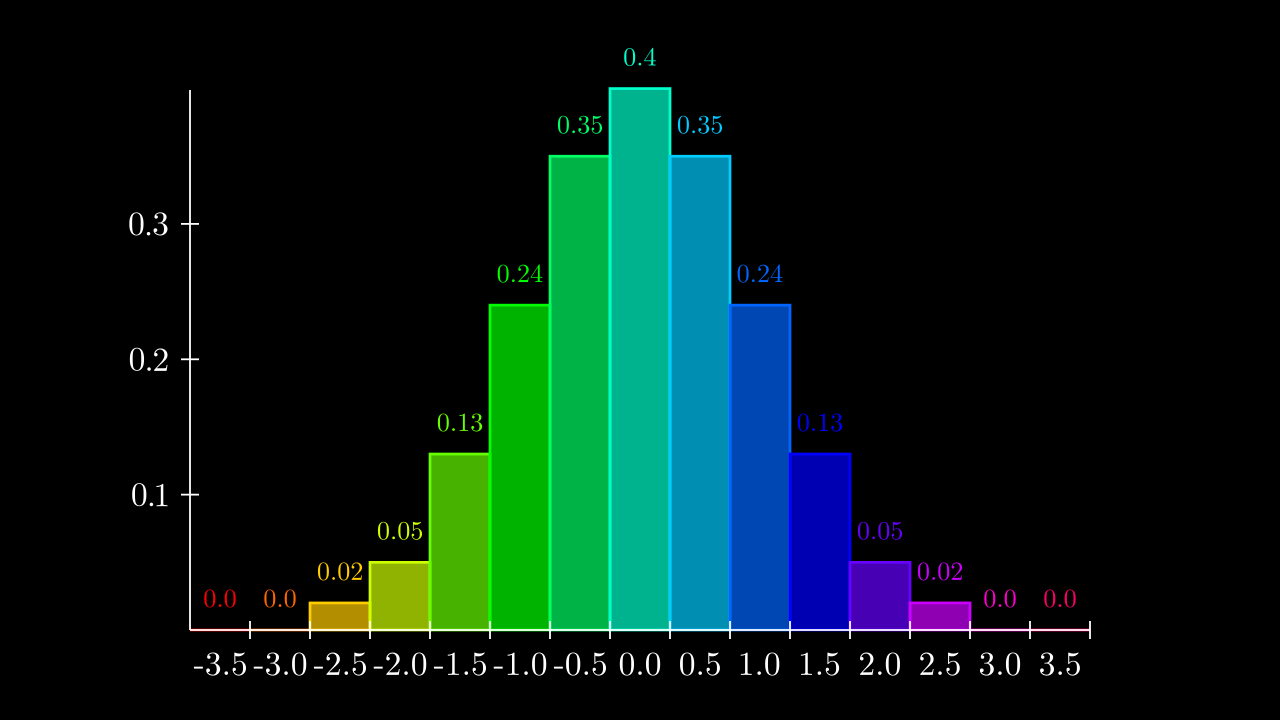

In [ ]:
class BarChartExample4(Scene):
    def construct(self):
        chart = BarChart(
            bar_width=1.0,
            bar_colors=histogram_direct.cols,
            values=np.round(histogram_direct.y, decimals = 2),
            bar_names=histogram_direct.labs,
            y_range=[0, np.max(histogram_direct.y), 0.1],
            y_length=6,
            x_length=10,
            x_axis_config={"font_size": 36},
        )

        c_bar_lbls = chart.get_bar_labels(font_size=28)

        self.add(chart, c_bar_lbls)



# don't remove below command for run button to work
%manim -qm -v WARNING BarChartExample4

In [ ]:
raw_data = pandas.read_csv('raw_data.csv')
print(raw_data)
raw_data.head()

            x         y  x_binned
0   -0.242743 -0.681276      -0.5
1   -0.328456 -0.975801      -0.5
2    1.804319  9.887372       1.5
3   -1.343278 -5.787550      -1.5
4   -0.283067 -3.247218      -0.5
..        ...       ...       ...
995  0.430984  3.004739       0.0
996 -0.119256 -1.390758      -0.5
997 -0.821731 -3.088627      -1.0
998 -0.039838  0.275259      -0.5
999  1.382855  7.116351       1.0

[1000 rows x 3 columns]


,x,y,x_binned
0,-0.242743,-0.681276,-0.5
1,-0.328456,-0.975801,-0.5
2,1.804319,9.887372,1.5
3,-1.343278,-5.787550,-1.5
4,-0.283067,-3.247218,-0.5


In [ ]:
raw_data['x_bin_python'] = pandas.cut(raw_data['x'], bins=10)
raw_data.head()

,x,y,x_binned,x_bin_python
0,-0.242743,-0.681276,-0.5,"(-0.741, -0.0557]"
1,-0.328456,-0.975801,-0.5,"(-0.741, -0.0557]"
2,1.804319,9.887372,1.5,"(1.316, 2.001]"
3,-1.343278,-5.787550,-1.5,"(-1.427, -0.741]"
4,-0.283067,-3.247218,-0.5,"(-0.741, -0.0557]"


In [ ]:
unique, counts = np.unique(raw_data.x_bin_python, return_counts=True)
print(unique)
print(counts)

[Interval(-3.491, -2.798, closed='right')
 Interval(-2.798, -2.112, closed='right')
 Interval(-2.112, -1.427, closed='right')
 Interval(-1.427, -0.741, closed='right')
 Interval(-0.741, -0.0557, closed='right')
 Interval(-0.0557, 0.63, closed='right')
 Interval(0.63, 1.316, closed='right')
 Interval(1.316, 2.001, closed='right')
 Interval(2.001, 2.687, closed='right')
 Interval(2.687, 3.372, closed='right')]
[  3  15  61 173 223 270 159  65  25   6]


In [ ]:
len(raw_data.x_bin_python)

1000

In [ ]:
midpoints = []

for k in range(len(unique)):
    midpoints.append(np.round((unique[k].left + unique[k].right)/2, decimals=2))
    
print(midpoints)

[-3.14, -2.46, -1.77, -1.08, -0.4, 0.29, 0.97, 1.66, 2.34, 3.03]


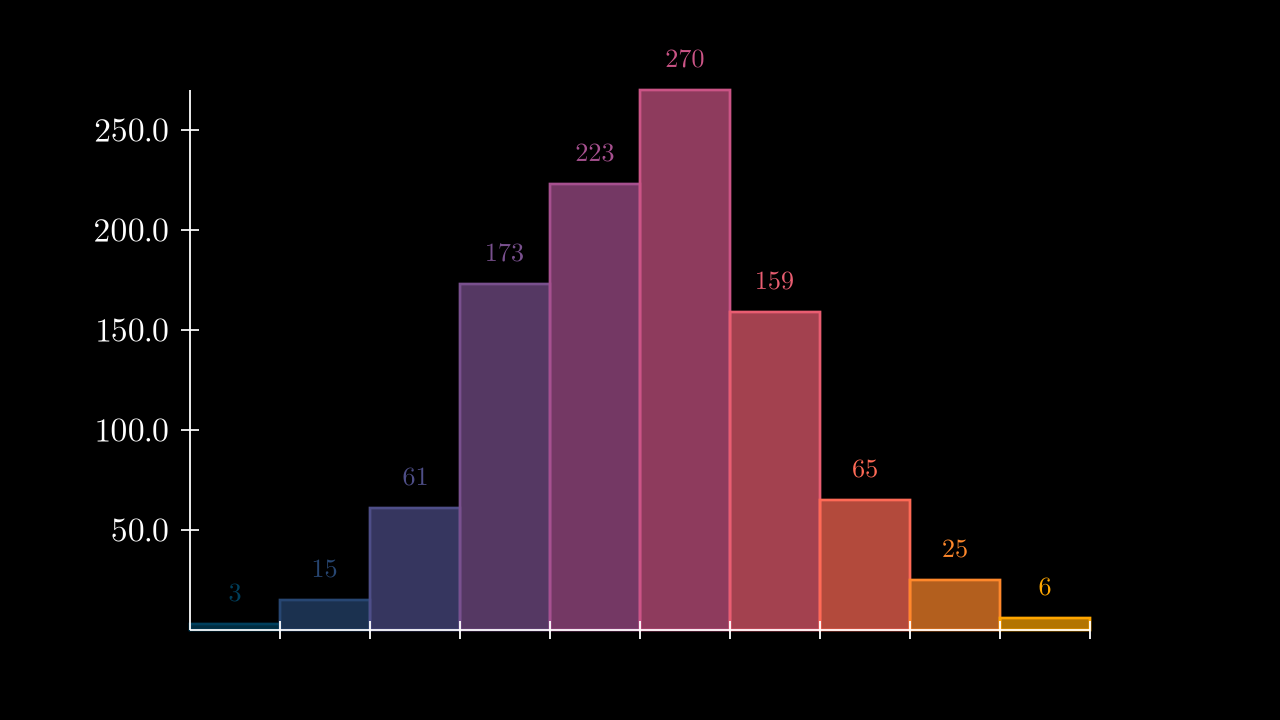

In [ ]:
class BarChartExample4(Scene):
    def construct(self):
        chart = BarChart(
            bar_width=1.0,
            #bar_colors=DEFAULT,
            values=counts,
            #bar_names=DEFAULT,
            y_range=[0, np.max(counts), len(raw_data.x)/20],
            y_length=6,
            x_length=10,
            x_axis_config={"font_size": 36},
        )

        c_bar_lbls = chart.get_bar_labels(font_size=28)

        self.add(chart, c_bar_lbls)



# don't remove below command for run button to work
%manim -qm -v WARNING BarChartExample4

In [ ]:
midpoints = []

for k in range(len(unique)):
    midpoints.append(np.round((unique[k].left + unique[k].right)/2, decimals=2))
    
print(midpoints)

[-3.14, -2.46, -1.77, -1.08, -0.4, 0.29, 0.97, 1.66, 2.34, 3.03]


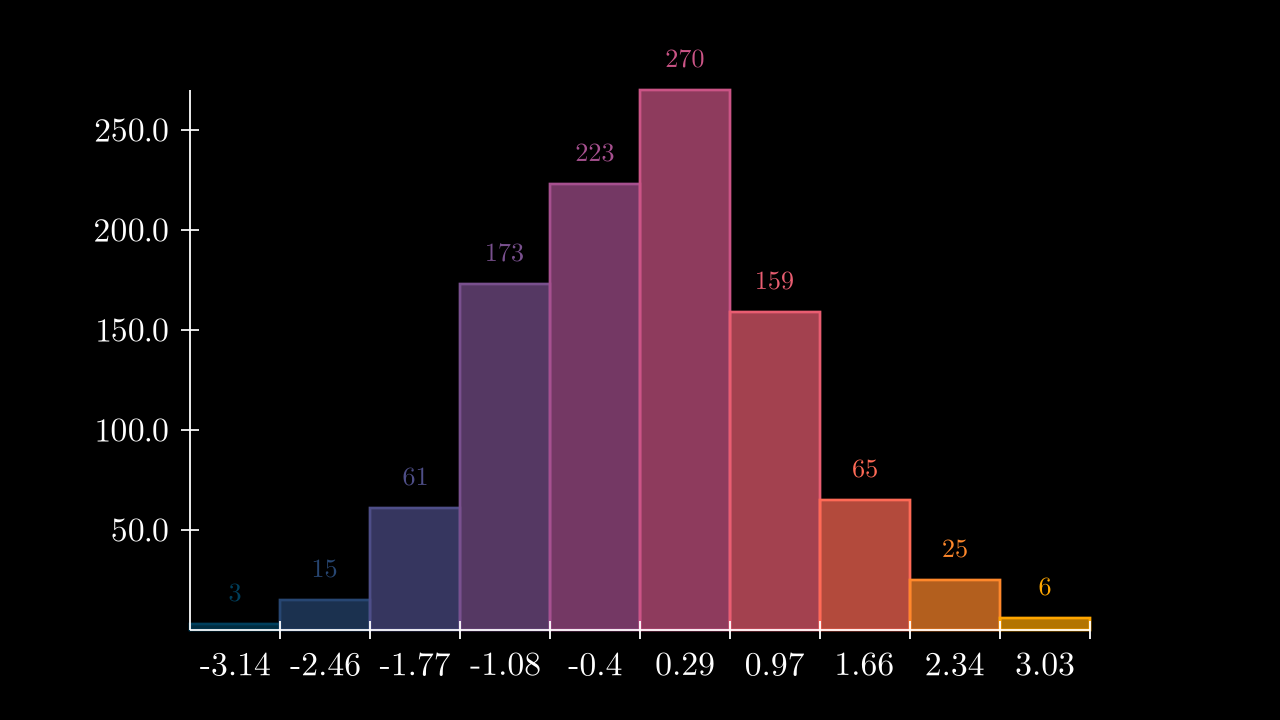

In [ ]:
class BarChartExample4(Scene):
    def construct(self):
        chart = BarChart(
            bar_width=1.0,
            #bar_colors=DEFAULT,
            values=counts,
            bar_names=midpoints,
            y_range=[0, np.max(counts), len(raw_data.x)/20],
            y_length=6,
            x_length=10,
            x_axis_config={"font_size": 36},
        )

        c_bar_lbls = chart.get_bar_labels(font_size=28)

        self.add(chart, c_bar_lbls)



# don't remove below command for run button to work
%manim -qm -v WARNING BarChartExample4

In [ ]:


start_counts = counts * 0
final_counts = counts

class BarChartAnimated(Scene):
    def construct(self):
        chart = BarChart(
            bar_width=1.0,
            #bar_colors=DEFAULT,
            values=start_counts,
            bar_names=midpoints,
            y_range=[0, np.max(counts), len(raw_data.x)/20],
            y_length=6,
            x_length=10,
            x_axis_config={"font_size": 36},
        )

        c_bar_lbls = chart.get_bar_labels(font_size=28)

        #self.add(chart, c_bar_lbls)

        self.play(Create(chart))
        self.wait(2)
 
        self.play(chart.animate.change_bar_values(final_counts), run_time=3)
        self.play(Create(chart.get_bar_labels(font_size=36))) 
 
        self.wait(3)

# don't remove below command for run button to work
%manim -qm -v WARNING BarChartAnimated
    




In [ ]:
raw_xy = pandas.read_csv('raw_xy.csv')
raw_xy

,x,y
0,-0.242743,-0.681276
1,-0.328456,-0.975801
2,1.804319,9.887372
3,-1.343278,-5.787550
4,-0.283067,-3.247218
...,...,...
95,0.505076,3.051195
96,-0.280172,-1.870970
97,-0.853350,-4.646395
98,0.780628,3.067231


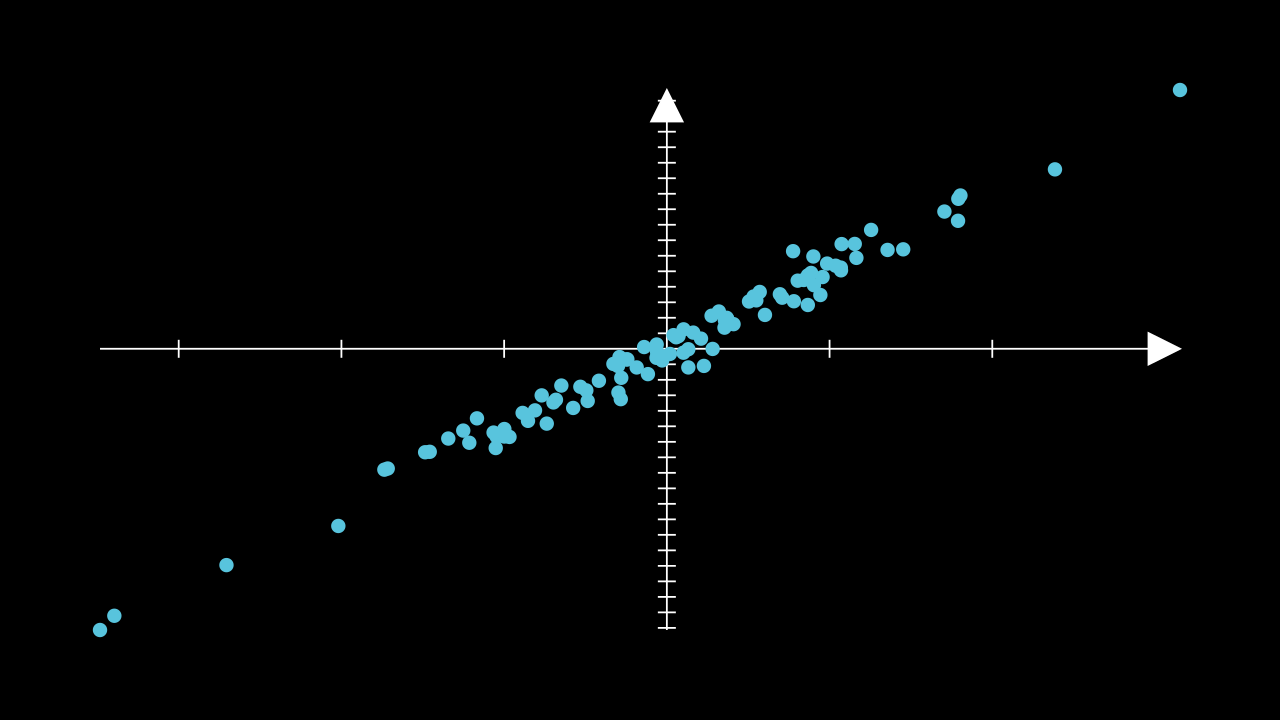

In [ ]:
# Modded from https://github.com/thomasnield/3mds/blob/main/20230814_scatterplots_in_manim.py



class ScatterPlotScene(Scene):
    def construct(self):


        # Add the Axes
        ax = Axes(x_range=[np.min(raw_xy.x), np.max(raw_xy.x), 1], 
                  y_range=[np.min(raw_xy.y), np.max(raw_xy.y), 1])
        self.add(ax)

        # Add the dots   # This NEEDS a data frame of TWO variables EXACTLY
        for x, y in raw_xy.values:
            dot = Dot(ax.c2p(x, y), color=BLUE) # Specifically, ax.c2p
            self.add(dot)


# don't remove below command for run button to work
%manim -qm -v WARNING ScatterPlotScene

In [ ]:
class ScatterPlotAnimatedScene(Scene):
    def construct(self):
        
        # Animate the creation of Axes
        ax = Axes(x_range=[np.min(raw_xy.x), np.max(raw_xy.x), 1], 
                  y_range=[np.min(raw_xy.y), np.max(raw_xy.y), 1])
        self.play(Write(ax))

        self.wait()  # wait for 1 second

        # Animate the creation of dots
        dots = [Dot(ax.c2p(x, y), color=BLUE) for x, y in raw_xy.values]
        
        self.play(LaggedStart(*[Write(dot) for dot in dots], lag_ratio=.05))

        self.wait()  # wait for 1 second


# don't remove below command for run button to work
%manim -qm -v WARNING ScatterPlotAnimatedScene

NameError: name 'raw_xy' is not defined

In [ ]:
sorted_xy = pandas.read_csv('sorted_xy.csv')
sorted_xy

,x,y
0,-3.483711,-18.136287
1,-3.395616,-17.218681
2,-2.706487,-13.950597
3,-2.019026,-11.425987
4,-1.736104,-7.795015
...,...,...
95,1.789583,8.255023
96,1.791331,9.672798
97,1.804319,9.887372
98,2.385206,11.572589


In [ ]:
class ScatterPlotAnimatedScene(Scene):
    def construct(self):
        
        # Animate the creation of Axes
        ax = Axes(x_range=[np.min(sorted_xy.x), np.max(sorted_xy.x), 1], 
                  y_range=[np.min(sorted_xy.y), np.max(sorted_xy.y), 1])
        self.play(Write(ax))

        self.wait()  # wait for 1 second

        # Animate the creation of dots
        dots = [Dot(ax.c2p(x, y), color=BLUE) for x, y in sorted_xy.values]
        
        self.play(LaggedStart(*[Write(dot) for dot in dots], lag_ratio=.05))

        self.wait()  # wait for 1 second


# don't remove below command for run button to work
%manim -qm -v WARNING ScatterPlotAnimatedScene

In [ ]:

# https://www.youtube.com/watch?v=n-VPhT17O68
# https://www.nahalab.com/manim

class Myscene(Scene):
    def construct(self):
        table = Table(
        [["1,1","1,2","1,3"],
        ["2,1","2,2","2,3"],
        ["3,1","3,2","3,3"]],
        include_outer_lines = True,
        row_labels=[MathTex(r"\frac{\pi}{2}"),Text(""),Text("")]
        ).scale(0.6)

        text = Text("(Row, Column)").scale(0.5).next_to(table, UP*2)

        
        self.play(Write(table), Write(text))

        self.wait(5)


# don't remove below command for run button to work
%manim -qm -v WARNING Myscene


In [ ]:


# https://www.youtube.com/watch?v=n-VPhT17O68
# https://www.nahalab.com/manim

class Myscene(Scene):
    def construct(self):
        table = Table(
        [["1,1","1,2","1,3"],
        ["2,1","2,2","2,3"],
        ["3,1","3,2","3,3"]],
        include_outer_lines = True,
        row_labels=[MathTex(r"\frac{\pi}{2}"),Text(""),Text("")]
        ).scale(0.6)

        text = Text("(Row, Column)").scale(0.5).next_to(table, UP*2)

        table.add_highlighted_cell((1,2), color=GREEN)
        table.add_highlighted_cell((1,3), color=RED)
        table.add_highlighted_cell((1,4), color=YELLOW)
        
        self.play(Write(table), Write(text))

        self.wait(5)


# don't remove below command for run button to work
%manim -qm -v WARNING Myscene



In [ ]:

# https://www.youtube.com/watch?v=n-VPhT17O68
# https://www.nahalab.com/manim

class Myscene(Scene):
    def construct(self):
        table = Table(
        [["1,1","1,2","1,3"],
        ["2,1","2,2","2,3"],
        ["3,1","3,2","3,3"]],
        include_outer_lines = True,
        row_labels=[MathTex(r"\frac{\pi}{2}"),Text(""),Text("")]
        ).scale(0.6)

        text = Text("(Row, Column)").scale(0.5).next_to(table, UP*2)

        table.add_highlighted_cell((1,2), color=GREEN)
        table.add_highlighted_cell((1,3), color=RED)
        table.add_highlighted_cell((1,4), color=YELLOW)

        for c in range(2,5):
            for r in range(2,4):
                table.add_highlighted_cell((r,c), color = BLUE)
                                
        
        self.play(Write(table), Write(text))

        self.wait(5)


# don't remove below command for run button to work
%manim -qm -v WARNING Myscene


In [ ]:

histogram_direct.iloc[0]

x           -3.5
y       0.000873
cols     #FF0000
labs        -3.5
Name: 0, dtype: object

In [ ]:


histogram_direct.iloc[0]['x']


-3.5

In [ ]:
histo_list = histogram_direct.values.tolist()


histo_list[0][0]
#histo_list


-3.5

In [ ]:

len(histo_list)


15

In [ ]:

for rowcount in range(len(histo_list)):
    for cellcount in range(len(histo_list[rowcount])):
        histo_list[rowcount][cellcount] = str(histo_list[rowcount][cellcount])
        
        
histo_list


[['-3.5', '0.0008726826950457', '#FF0000', '-3.5'],
 ['-3.0', '0.004431848411938', '#FF6600', '-3.0'],
 ['-2.5', '0.0175283004935685', '#FFCC00', '-2.5'],
 ['-2.0', '0.0539909665131881', '#CCFF00', '-2.0'],
 ['-1.5', '0.129517595665892', '#66FF00', '-1.5'],
 ['-1.0', '0.241970724519143', '#00FF00', '-1.0'],
 ['-0.5', '0.3520653267643', '#00FF66', '-0.5'],
 ['0.0', '0.398942280401433', '#00FFCC', '0.0'],
 ['0.5', '0.3520653267643', '#00CCFF', '0.5'],
 ['1.0', '0.241970724519143', '#0066FF', '1.0'],
 ['1.5', '0.129517595665892', '#0000FF', '1.5'],
 ['2.0', '0.0539909665131881', '#6600FF', '2.0'],
 ['2.5', '0.0175283004935685', '#CC00FF', '2.5'],
 ['3.0', '0.004431848411938', '#FF00CC', '3.0'],
 ['3.5', '0.0008726826950457', '#FF0066', '3.5']]

In [ ]:

histogram_direct.columns.values

In [ ]:

class Myscene2(Scene):
    def construct(self):
        table = Table(histo_list[:5],
        include_outer_lines = True,
        col_labels = [Text("x"),Text("y"),Text("cols"),Text("labs")]).scale(0.7)

        
        self.play(Write(table))

        self.wait(5)


# don't remove below command for run button to work
%manim -qm -v WARNING Myscene2
